In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train.shape

(60000, 28, 28)

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

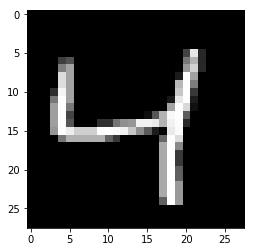

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap='gray')

In [50]:
from keras.utils import to_categorical

In [51]:
y_train = to_categorical(y_train)

In [52]:
y_train.shape

(60000, 10)

In [53]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [54]:
x_train = x_train.reshape(60000, 784)

In [55]:
x_train.shape

(60000, 784)

model = Sequential()
model.add(Dense(10, input_shape = (784,), activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='SGD')
model.fit(x_train, y_train, epochs=epochs, batch_size=32)

In [67]:
model = Sequential()
model.add(Dense(128, input_shape = (784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='sgd')
model.fit(x_train, y_train, epochs=100, batch_size=10000)

Epoch 1/100
60000/60000 [==============================] - 1s 12us/step - loss: 13.6549 - acc: 0.1417
Epoch 2/100
60000/60000 [==============================] - 0s 8us/step - loss: 12.1788 - acc: 0.2290
Epoch 3/100
60000/60000 [==============================] - 0s 8us/step - loss: 10.5622 - acc: 0.3300
Epoch 4/100
60000/60000 [==============================] - 1s 8us/step - loss: 10.3367 - acc: 0.3384
Epoch 5/100
60000/60000 [==============================] - 1s 11us/step - loss: 9.7633 - acc: 0.3692
Epoch 6/100
60000/60000 [==============================] - 1s 10us/step - loss: 8.8765 - acc: 0.4163
Epoch 7/100
60000/60000 [==============================] - 0s 8us/step - loss: 8.0856 - acc: 0.4673
Epoch 8/100
60000/60000 [==============================] - 0s 8us/step - loss: 7.5454 - acc: 0.5067
Epoch 9/100
60000/60000 [==============================] - 0s 8us/step - loss: 7.4064 - acc: 0.5157
Epoch 10/100
60000/60000 [==============================] - 1s 8us/step - loss: 7.3342 - acc:

# With CNN

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y_train)

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [5]:
x_train[0].shape

(28, 28, 1)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = x_train[0].shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 11s 187us/step - loss: 3.3107 - acc: 0.7730
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0527 - acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0271 - acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0141 - acc: 0.9956
Epoch 5/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0095 - acc: 0.9970
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0052 - acc: 0.9986
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0036 - acc: 0.9989
Epoch 8/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0029 - acc: 0.9991
Epoch 9/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0036 - acc: 0.9988
Epoch 10/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0018 - 

In [79]:
probs

array([[  5.47697738e-12,   3.98788749e-13,   1.89338412e-09, ...,
          9.99999881e-01,   2.24617214e-10,   1.59004436e-08],
       [  1.54734017e-10,   2.40348204e-08,   1.00000000e+00, ...,
          6.67806587e-19,   6.57986887e-10,   5.21712527e-16],
       [  8.68864713e-15,   9.99999404e-01,   1.66231651e-08, ...,
          4.63452221e-10,   5.82207861e-07,   1.97980469e-11],
       ..., 
       [  1.68286981e-14,   6.01942940e-11,   6.12165365e-15, ...,
          5.36994493e-09,   4.06898799e-08,   9.80910926e-08],
       [  1.23837451e-09,   3.70683692e-11,   9.77595175e-13, ...,
          6.18598163e-13,   2.98625255e-05,   1.72491896e-10],
       [  1.99371414e-07,   1.19770366e-11,   9.41843723e-08, ...,
          1.62612328e-13,   2.93179710e-07,   1.90112908e-11]], dtype=float32)

In [80]:
import numpy as np

In [82]:
np.argmax(probs, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

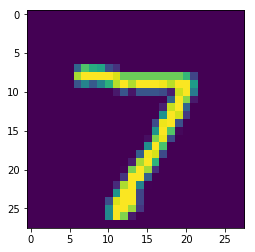

In [87]:
plt.imshow(x_test[0])

In [88]:
probs.shape

(10000, 10)

In [90]:
keras.__version__

'2.1.2'

# Validation

In [8]:
x_test = x_test.reshape(10000, 28, 28, 1)
y_test = to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = x_train[0].shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/step - loss: 7.8056 - acc: 0.4888 - val_loss: 0.1323 - val_acc: 0.9608
Epoch 2/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0773 - acc: 0.9769 - val_loss: 0.0524 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0343 - acc: 0.9893 - val_loss: 0.0482 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0467 - val_acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0505 - val_acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0529 - val_acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0547 - 